In [55]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [56]:
df = pd.read_csv("movies_with_agg_feats.csv", index_col=0)
df.head()

,Processed Title,Success,main_char_rel_diag_length,stdvs_unique_words_above_mean,FK_read_level_mean_char,stdvs_n_stop_words_above_mean,stdvs_n_curse_words_above_mean,stdvs_n_mentions_others_above_mean
Avatar,Avatar,1,39.537232,-0.090538,2.4,0.063141,0.106202,-0.541956
The Dark Knight Rises,"Dark-Knight-Rises,-The",1,23.705825,0.255438,2.2,0.789323,-0.686754,-0.176310
The Avengers,"Avengers,-The",1,30.146047,-0.118151,3.0,-0.004098,-0.709410,-0.438622
Pirates of the Caribbean: Dead Man's Chest,Pirates-of-the-Caribbean-Dead-Man's-Chest,1,36.743621,-0.481995,1.8,-0.057889,-0.732066,-0.867858
Men in Black 3,Men-in-Black-3,1,57.328163,0.742729,2.8,0.533814,-0.437539,1.349863


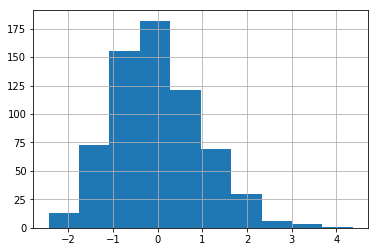

In [57]:
df["stdvs_unique_words_above_mean"].hist()
plt.show()

In [58]:
df["stdvs_unique_words_above_mean"] = df["stdvs_unique_words_above_mean"].apply(lambda x: round(x))

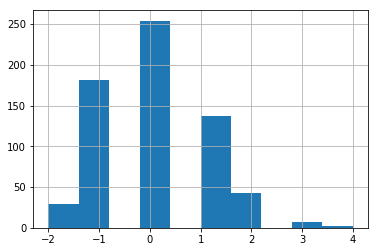

In [59]:
df["stdvs_unique_words_above_mean"].hist()
plt.show()

In [60]:
df["stdvs_unique_words_above_mean"] = df["stdvs_unique_words_above_mean"].apply(lambda x: str(round(x)))

In [61]:
df["FK_read_level_mean_char"] = df["FK_read_level_mean_char"].apply(lambda x: str(round(x)))
df["stdvs_n_stop_words_above_mean"] = df["stdvs_n_stop_words_above_mean"].apply(lambda x: str(round(x)))
df["stdvs_n_curse_words_above_mean"] = df["stdvs_n_curse_words_above_mean"].apply(lambda x: str(round(x)))
df["stdvs_n_mentions_others_above_mean"] = df["stdvs_n_mentions_others_above_mean"].apply(lambda x: str(round(x)))

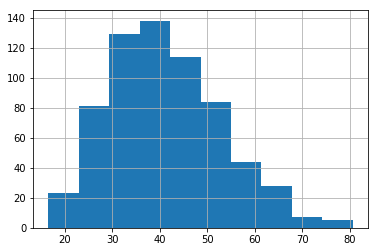

In [62]:
df["main_char_rel_diag_length"].hist()
plt.show()

In [63]:
X = df.drop(["Success", "Processed Title"], axis=1)
X = pd.get_dummies(X)
y = df["Success"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

In [39]:
y_test.value_counts()

1    108
0     23
Name: Success, dtype: int64

In [40]:
0.824

0.824

In [65]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7175572519083969

In [66]:
rf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [67]:
rf.score(X_train, y_train)

0.9865900383141762

In [68]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.8244274809160306

In [69]:
logreg.score(X_train, y_train)

0.8275862068965517

In [70]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.8244274809160306

In [71]:
svm.score(X_train, y_train)

0.8275862068965517

In [72]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8091603053435115

In [73]:
knn.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])